In [1]:
# load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [4]:
# loading the data , make sure you know where you are. 
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#take a close look at data, no of column, rows, data type, non null values
cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# investigate and return unique cateogry in a column
cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [9]:
# rename using a dictionary becasue they are object data type
cancer["diagnosis"] = cancer['diagnosis'].replace({
    "M": "Malignant", 
    "B": "Benign"
    })
cancer["diagnosis"].unique()

array(['Malignant', 'Benign'], dtype=object)

In [11]:
# use value count for good and bad case
cancer['diagnosis'].value_counts()

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

In [13]:
# % count?
cancer['diagnosis'].value_counts(normalize = True)

diagnosis
Benign       0.627417
Malignant    0.372583
Name: proportion, dtype: float64

In [15]:
# use groupby category in a column
cancer.groupby("diagnosis").size()

diagnosis
Benign       357
Malignant    212
dtype: int64

In [19]:
#get % by getting the length of this column
(cancer.groupby("diagnosis").size() / cancer.shape[0])*100

diagnosis
Benign       62.741652
Malignant    37.258348
dtype: float64

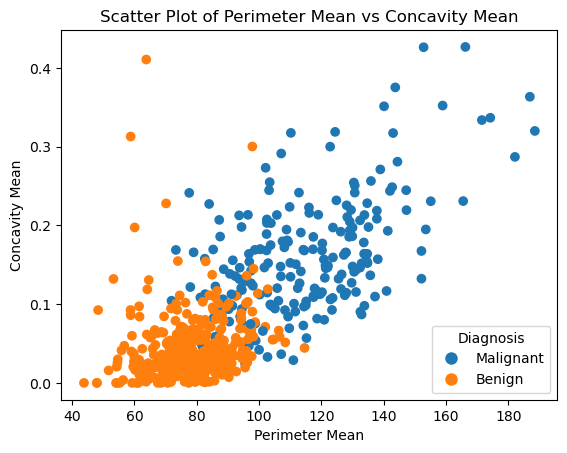

In [20]:
# use maplotlit
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()

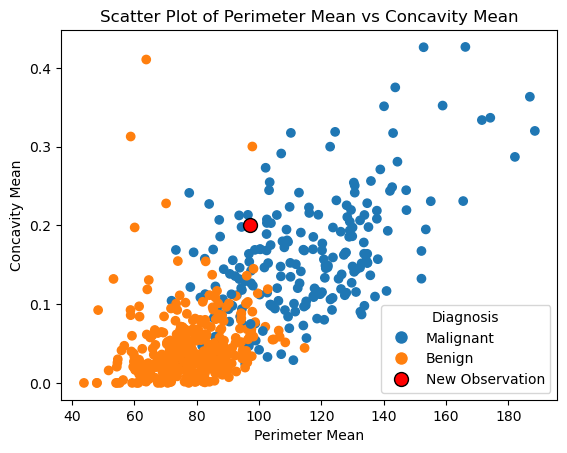

In [21]:
# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
plt.show()

In [22]:
# usuall standardize the data first, but not for here
# new observation
new_obs_Perimeter = 97
new_obs_Concavity = 0.20

In [29]:
#dist calculation

cancer['dist_from_new'] =(

(cancer ['perimeter_mean'] - new_obs_Perimeter)**2 +
(cancer['concavity_mean'] - new_obs_Concavity)**2 
) ** (1/2)


In [30]:
cancer ['dist_from_new']

0      25.800194
1      35.900178
2      33.000000
3      19.420044
4      38.100000
         ...    
564    45.000021
565    34.200046
566    11.300511
567    43.100266
568    49.080407
Name: dist_from_new, Length: 569, dtype: float64

In [31]:
# take the least 5
nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "diagnosis",
    "dist_from_new"
]]

nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Malignant,0.156924
15,96.73,0.16390,Malignant,0.272403
514,97.26,0.07486,Malignant,0.288548
54,97.26,0.05253,Malignant,0.298910


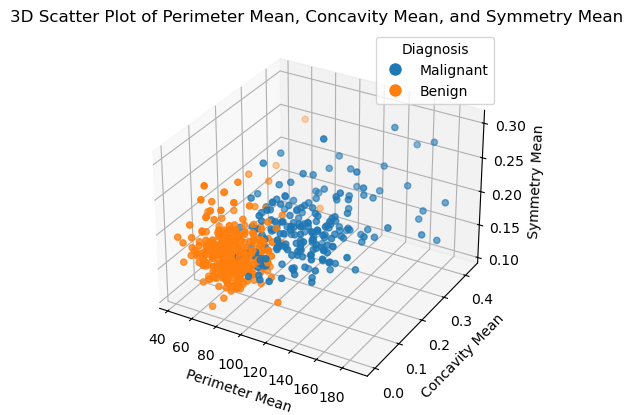

In [32]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\tinti\\miniconda3\\envs\\dsi_participant\\lib\\site-packages\\matplotlib\\pyplot.py'>

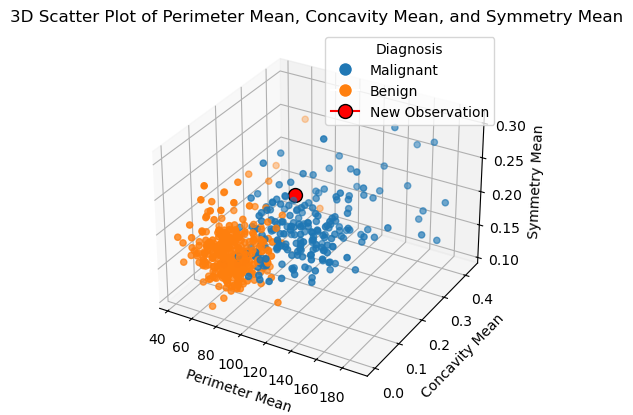

In [33]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

# Plot the new observation
ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'], 
             new_observation['symmetry_mean'], color='red', edgecolor='black', 
             s=100, marker='o', label='New Observation')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add custom legend for new observation
handles.append(plt.Line2D([0], [0], marker='o', color='red', label='New Observation', 
                          markersize=10, markeredgecolor='black'))

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt


In [34]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.20
new_obs_Symmetry = 0.22

In [36]:
##********** **Calculating the distance *******as KNN do ********

cancer["dist_from_new"] = (
      (cancer["perimeter_mean"] - new_obs_Perimeter) ** 2
    + (cancer["concavity_mean"] - new_obs_Concavity) ** 2
    + (cancer["symmetry_mean"] - new_obs_Symmetry) ** 2
)**(1/2)

cancer["dist_from_new"]

0      25.800203
1      35.900199
2      33.000003
3      19.420085
4      38.100020
         ...    
564    45.000046
565    34.200075
566    11.300676
567    43.100270
568    49.080446
Name: dist_from_new, Length: 569, dtype: float64

In [37]:
nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "symmetry_mean",
    "diagnosis",
    "dist_from_new"]]

nearest_5

,perimeter_mean,concavity_mean,symmetry_mean,diagnosis,dist_from_new
291,97.03,0.05940,0.1879,Benign,0.147305
138,96.85,0.15390,0.1957,Malignant,0.158795
15,96.73,0.16390,0.2303,Malignant,0.272597
514,97.26,0.07486,0.1561,Malignant,0.295539
54,97.26,0.05253,0.1616,Malignant,0.304562


In [38]:
from sklearn import set_config
set_config (transform_output= "pandas"
            )

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
cancer_train = cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignant,122.80,0.30010
1,Malignant,132.90,0.08690
2,Malignant,130.00,0.19740
3,Malignant,77.58,0.24140
4,Malignant,135.10,0.19800
...,...,...,...
564,Malignant,142.00,0.24390
565,Malignant,131.20,0.14400
566,Malignant,108.30,0.09251
567,Malignant,140.10,0.35140


In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [43]:
# define our perditor variable (xs)
X = cancer_train[["perimeter_mean", "concavity_mean"]]
y = cancer_train[["diagnosis"]]

In [44]:
# fit into the knn model
knn.fit(X,y)

c:\Users\tinti\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [45]:
new_obs = pd.DataFrame({"perimeter_mean": [97], "concavity_mean": [0.20]})
knn.predict(new_obs)

array(['Malignant'], dtype=object)

In [46]:
# predict our diagnosis 
knn.predict(new_obs)

array(['Malignant'], dtype=object)

### Jan 8 ####

In [ ]:
#divde data
# adj paramente
#tuning
#play on test

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [50]:
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
# clean data
cancer["diagnosis"] = cancer["diagnosis"].replace({
    "M" : "Malignant",
    "B" : "Benign"
})

cancer["diagnosis"].unique()

array(['Malignant', 'Benign'], dtype=object)

In [ ]:
## Start fitting the model ### AW

In [81]:
# create a copy of the df
standardized_cancer = cancer.copy()

In [82]:
# remove colns that not need to be scale
columns_to_exclude = ['id', 'diagnosis']

In [83]:
# create a df that exclude the response variable and index

columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

In [84]:
# scale the df 
scaler = StandardScaler()
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale])

In [85]:
# call again the whole df
standardized_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [54]:
standardized_cancer = cancer.copy()

columns_to_exclude = ['id', 'diagnosis']

columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

scaler = StandardScaler()
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale])
standardized_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [57]:
#np.random.seed(1)

cancer_train, cancer_test = train_test_split(
    standardized_cancer, train_size=0.75, shuffle= True,
    stratify=standardized_cancer["diagnosis"], random_state= 123
)


In [59]:
#cancer_train.info()
cancer_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 257 to 200
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       143 non-null    int64  
 1   diagnosis                143 non-null    object 
 2   radius_mean              143 non-null    float64
 3   texture_mean             143 non-null    float64
 4   perimeter_mean           143 non-null    float64
 5   area_mean                143 non-null    float64
 6   smoothness_mean          143 non-null    float64
 7   compactness_mean         143 non-null    float64
 8   concavity_mean           143 non-null    float64
 9   concave points_mean      143 non-null    float64
 10  symmetry_mean            143 non-null    float64
 11  fractal_dimension_mean   143 non-null    float64
 12  radius_se                143 non-null    float64
 13  texture_se               143 non-null    float64
 14  perimeter_se             143 

In [60]:
knn = KNeighborsClassifier(n_neighbors=5
                           )

In [61]:
X = cancer_train[['perimeter_mean','concavity_mean']]
y = cancer_train ['diagnosis']

In [62]:
knn.fit(X,y)

KNeighborsClassifier()

In [63]:
cancer_test["predicted"] = knn.predict(cancer_test[["perimeter_mean", "concavity_mean"]])
cancer_test[["id", "diagnosis", "predicted"]]

,id,diagnosis,predicted
257,886776,Malignant,Malignant
382,90250,Benign,Benign
241,883539,Benign,Benign
527,91813702,Benign,Benign
368,9011971,Malignant,Malignant
...,...,...,...
20,8510653,Benign,Benign
247,884626,Benign,Malignant
29,853201,Malignant,Malignant
177,87281702,Malignant,Malignant


In [64]:
knn.score(
    cancer_test[["perimeter_mean", "concavity_mean"]],
    cancer_test["diagnosis"]
)

0.9230769230769231

In [65]:
pd.crosstab(
    cancer_test["diagnosis"],
    cancer_test["predicted"],
    rownames = ['Actual'],
    colnames = ['Predicted']
)

Predicted,Benign,Malignant
Actual,,
Benign,84,6
Malignant,5,48


In [66]:
precision_score(
    y_true=cancer_test["diagnosis"],
    y_pred=cancer_test["predicted"],
    pos_label="Malignant"
)

0.8888888888888888

In [67]:
recall_score(
    y_true=cancer_test["diagnosis"],
    y_pred=cancer_test["predicted"],
    pos_label="Malignant"
)

0.9056603773584906

In [69]:
cancer_subtrain, cancer_validation = train_test_split(
    cancer_train, train_size=0.75, stratify=cancer_train["diagnosis"]
)

# fit the model on the sub-training data
knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_subtrain[["perimeter_mean", "concavity_mean"]]
y = cancer_subtrain["diagnosis"]
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

In [70]:
acc = knn.score(
    cancer_validation[["perimeter_mean", "concavity_mean"]],
    cancer_validation["diagnosis"]
)
acc

0.8785046728971962

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[["perimeter_mean", "concavity_mean"]]
y = cancer_train["diagnosis"]

returned_dictionary = cross_validate(
    estimator=knn,
    cv=5,    # setting up the cross validation number
    X=X,
    y=y
)

cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df

,fit_time,score_time,test_score
0,0.009519,0.007506,0.906977
1,0.004515,0.007529,0.905882
2,0.002006,0.010254,0.929412
3,0.005520,0.011033,0.894118
4,0.003000,0.009766,0.894118


In [72]:
cv_5_metrics = cv_5_df.agg(["mean", "sem"])

cv_5_metrics

,fit_time,score_time,test_score
mean,0.004912,0.009218,0.906101
sem,0.001301,0.000723,0.006448


In [73]:
parameter_grid = {
    "n_neighbors": range(1, 100, 5),
}

In [74]:
cancer_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

In [76]:
cancer_tune_grid.fit(
    cancer_train[["perimeter_mean", "concavity_mean"]],
    cancer_train["diagnosis"]
)

#accuracies_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
#accuracies_grid

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 100, 5)})

In [77]:
accuracies_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002227,0.000748,0.005310,0.001341,1,{'n_neighbors': 1},1.000000,0.860465,0.953488,0.883721,0.883721,0.930233,0.857143,0.857143,0.880952,0.904762,0.901163,0.044625,20
1,0.002966,0.000881,0.004359,0.000745,6,{'n_neighbors': 6},0.930233,0.906977,0.953488,0.953488,0.976744,0.906977,0.904762,0.857143,0.880952,0.928571,0.919934,0.034188,5
2,0.002659,0.001008,0.005164,0.001184,11,{'n_neighbors': 11},0.953488,0.883721,0.930233,0.930233,0.930233,0.930233,0.904762,0.857143,0.857143,0.904762,0.908195,0.031352,18
3,0.002157,0.000382,0.004882,0.001504,16,{'n_neighbors': 16},0.953488,0.860465,0.953488,0.953488,0.953488,0.906977,0.880952,0.857143,0.857143,0.928571,0.910520,0.040990,15
4,0.002278,0.000706,0.005006,0.001240,21,{'n_neighbors': 21},0.953488,0.883721,0.953488,0.930233,0.953488,0.906977,0.880952,0.857143,0.857143,0.928571,0.910520,0.036819,15
5,0.002358,0.000396,0.004752,0.001247,26,{'n_neighbors': 26},0.953488,0.860465,0.953488,0.953488,0.953488,0.906977,0.880952,0.857143,0.857143,0.928571,0.910520,0.040990,15
6,0.002405,0.000453,0.004578,0.001462,31,{'n_neighbors': 31},0.953488,0.860465,0.953488,0.953488,0.953488,0.906977,0.880952,0.857143,0.833333,0.928571,0.908140,0.044557,19
7,0.002615,0.000959,0.004963,0.001076,36,{'n_neighbors': 36},0.953488,0.860465,0.953488,0.953488,0.953488,0.906977,0.928571,0.857143,0.833333,0.928571,0.912901,0.043938,14
8,0.002540,0.000554,0.005002,0.001010,41,{'n_neighbors': 41},0.953488,0.883721,0.953488,0.953488,0.953488,0.906977,0.928571,0.857143,0.833333,0.928571,0.915227,0.041657,13
9,0.002553,0.000750,0.004071,0.000756,46,{'n_neighbors': 46},0.953488,0.883721,0.953488,0.953488,0.953488,0.906977,0.928571,0.857143,0.857143,0.928571,0.917608,0.037368,6


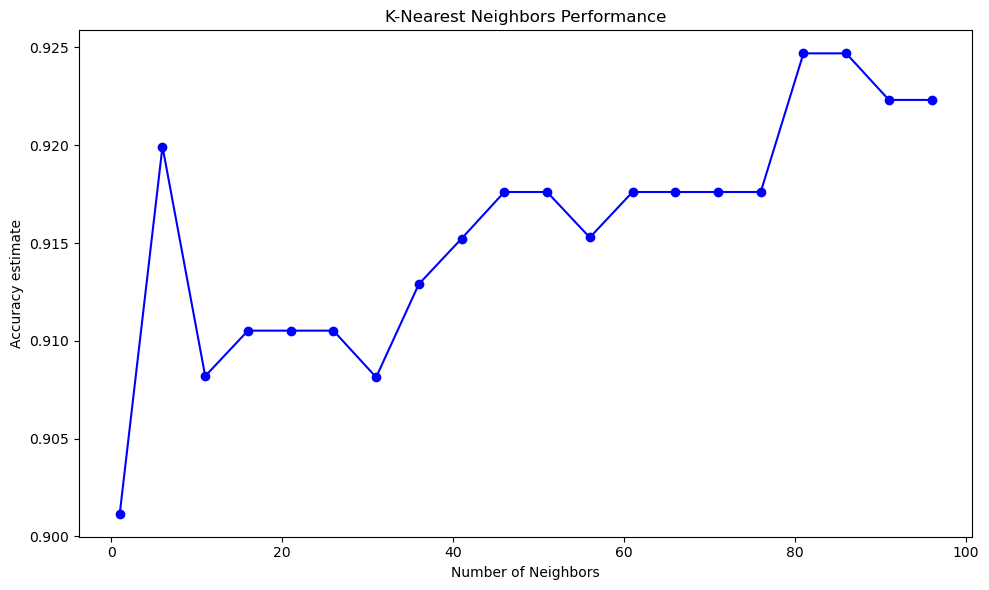

In [78]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [79]:
cancer_tune_grid.best_params_

{'n_neighbors': 81}

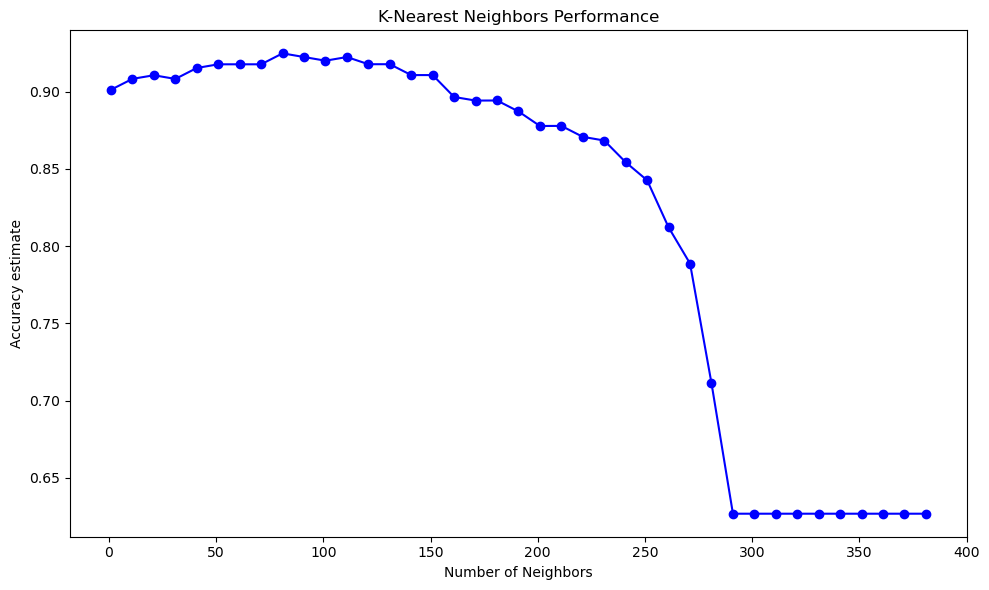

In [80]:
large_param_grid = {
    "n_neighbors": range(1, 385, 10),
}

large_cancer_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=large_param_grid,
    cv=10
)

large_cancer_tune_grid.fit(
    cancer_train[["perimeter_mean", "concavity_mean"]],
    cancer_train["diagnosis"]
)

large_accuracies_grid = pd.DataFrame(large_cancer_tune_grid.cv_results_)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(large_accuracies_grid['param_n_neighbors'], large_accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

#split the data 
# grid
grid 

K achieve higheest
using score method

Regression

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [87]:
from sklearn import set_config
set_config(transform_output="pandas")

In [89]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


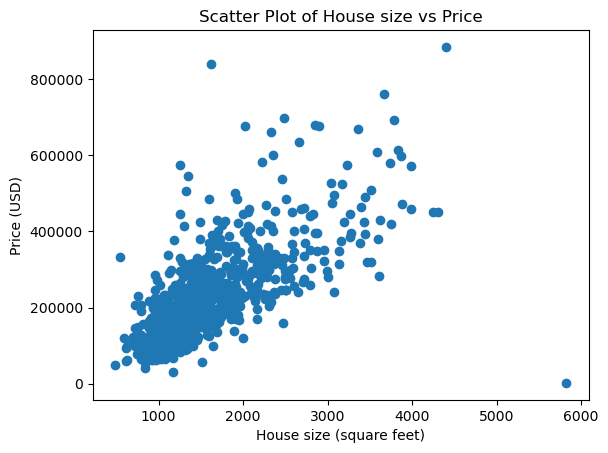

In [91]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [92]:
# don't need to deal with outliner
# price can be affect the house size
# taking average of their value
# predict the price of house

In [94]:
# select random sample (small size)

np.random.seed(123)

small_sacramento = sacramento.sample(n=30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
185,2610 PHYLLIS AVE,SACRAMENTO,95820,CA,2,1,804,Residential,Mon May 19 00:00:00 EDT 2008,120000,38.531050,-121.479574
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266
487,6000 BIRCHGLADE WAY,CITRUS HEIGHTS,95621,CA,4,2,1351,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.701660,-121.323249
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761
674,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969
177,251 CHANGO CIR,SACRAMENTO,95835,CA,4,2,2218,Residential,Mon May 19 00:00:00 EDT 2008,311328,38.682370,-121.539147
217,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,-121.549049
589,7204 THOMAS DR,NORTH HIGHLANDS,95660,CA,3,2,1152,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.697898,-121.377687
696,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
602,7349 FLETCHER FARM DR,SACRAMENTO,95828,CA,4,2,1587,Residential,Mon May 19 00:00:00 EDT 2008,127500,38.490690,-121.382619


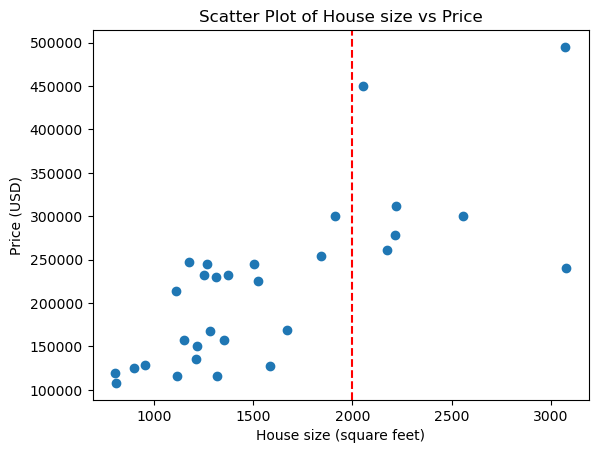

In [95]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [97]:
# abs difference between our house and the data point (observation)

small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()
small_sacramento["dist"]

185    1196
210     214
487     649
267     175
674     685
177     218
217     750
589     848
696     720
602     413
229     625
456      90
526     888
531     789
252     680
227      53
567     824
162     885
240     731
75     1190
388     157
657     783
279    1099
601     497
788     555
303     331
221     478
4      1076
203    1070
273    1043
Name: dist, dtype: int64

In [99]:
nearest_neighbors = small_sacramento.nsmallest(5, "dist")
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
227,3108 DELWOOD WAY,SACRAMENTO,95821,CA,4,2,2053,Residential,Fri May 16 00:00:00 EDT 2008,450000,38.621566,-121.370882,53
456,5651 OVERLEAF WAY,SACRAMENTO,95835,CA,4,2,1910,Residential,Tue May 20 00:00:00 EDT 2008,300500,38.677454,-121.494791,90
388,4901 MILLNER WAY,ELK GROVE,95757,CA,3,2,1843,Residential,Wed May 21 00:00:00 EDT 2008,254200,38.386920,-121.447349,157
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761,175
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266,214


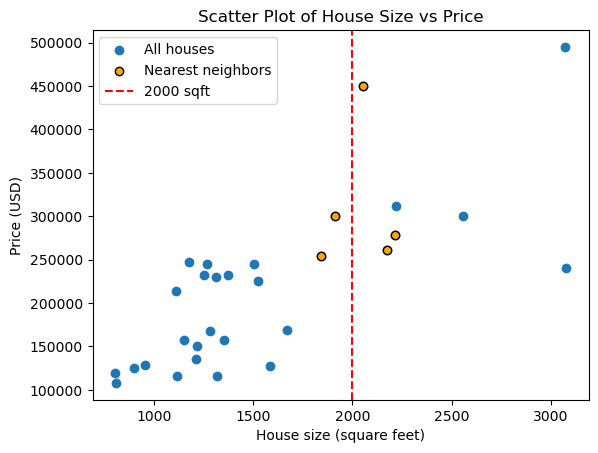

In [100]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [101]:
prediction = nearest_neighbors["price"].mean()
prediction

308740.0

In [102]:
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75, random_state=42
)

In [104]:
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [105]:
knn_regressor = KNeighborsRegressor()

In [106]:
param_grid = {
    "n_neighbors": range(1, 201, 3),        # But wait...? What is this?
}

In [108]:
sacr_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error" # we can also use "R2"
)

In [109]:
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [112]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015950,0.028451,0.005170,0.005317,1,{'n_neighbors': 1},-112075.959498,-113997.393596,-117026.607659,-120574.497484,-98703.354492,-112475.562546,7462.628569,67
1,0.001863,0.000750,0.002298,0.001253,4,{'n_neighbors': 4},-87544.667287,-83883.876555,-83913.469660,-104704.353254,-85027.749120,-89014.823175,7957.008142,56
2,0.001903,0.000803,0.003573,0.004661,7,{'n_neighbors': 7},-86504.059436,-82825.683348,-76131.355307,-102065.903265,-79440.331044,-85393.466480,9022.456430,35
3,0.001845,0.000427,0.002103,0.000662,10,{'n_neighbors': 10},-84090.805474,-82910.735403,-78152.835102,-102051.387567,-74177.616156,-84276.675940,9563.818797,27
4,0.001809,0.000517,0.001903,0.000664,13,{'n_neighbors': 13},-84904.213103,-81367.275879,-79773.776612,-100931.021005,-75241.782711,-84443.613862,8808.991745,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001902,0.000802,0.004737,0.000988,187,{'n_neighbors': 187},-92650.337006,-88889.235388,-90004.888176,-101845.246945,-77821.033008,-90242.148105,7701.974316,62
63,0.001530,0.000480,0.004011,0.000558,190,{'n_neighbors': 190},-92895.085263,-89245.862528,-90289.489219,-102084.469772,-78056.396280,-90514.260612,7699.296145,63
64,0.001581,0.000476,0.004367,0.001271,193,{'n_neighbors': 193},-93007.820652,-89594.971914,-90591.944719,-102189.040603,-78243.200165,-90725.395610,7664.535088,64
65,0.002137,0.000483,0.005088,0.002020,196,{'n_neighbors': 196},-93187.805582,-89786.909552,-90765.041431,-102241.600388,-78394.469000,-90875.165190,7635.553151,65


In [113]:
# absolute the result
results["mean_test_score"]=results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015950,0.028451,0.005170,0.005317,1,{'n_neighbors': 1},-112075.959498,-113997.393596,-117026.607659,-120574.497484,-98703.354492,112475.562546,7462.628569,67
1,0.001863,0.000750,0.002298,0.001253,4,{'n_neighbors': 4},-87544.667287,-83883.876555,-83913.469660,-104704.353254,-85027.749120,89014.823175,7957.008142,56
2,0.001903,0.000803,0.003573,0.004661,7,{'n_neighbors': 7},-86504.059436,-82825.683348,-76131.355307,-102065.903265,-79440.331044,85393.466480,9022.456430,35
3,0.001845,0.000427,0.002103,0.000662,10,{'n_neighbors': 10},-84090.805474,-82910.735403,-78152.835102,-102051.387567,-74177.616156,84276.675940,9563.818797,27
4,0.001809,0.000517,0.001903,0.000664,13,{'n_neighbors': 13},-84904.213103,-81367.275879,-79773.776612,-100931.021005,-75241.782711,84443.613862,8808.991745,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001902,0.000802,0.004737,0.000988,187,{'n_neighbors': 187},-92650.337006,-88889.235388,-90004.888176,-101845.246945,-77821.033008,90242.148105,7701.974316,62
63,0.001530,0.000480,0.004011,0.000558,190,{'n_neighbors': 190},-92895.085263,-89245.862528,-90289.489219,-102084.469772,-78056.396280,90514.260612,7699.296145,63
64,0.001581,0.000476,0.004367,0.001271,193,{'n_neighbors': 193},-93007.820652,-89594.971914,-90591.944719,-102189.040603,-78243.200165,90725.395610,7664.535088,64
65,0.002137,0.000483,0.005088,0.002020,196,{'n_neighbors': 196},-93187.805582,-89786.909552,-90765.041431,-102241.600388,-78394.469000,90875.165190,7635.553151,65


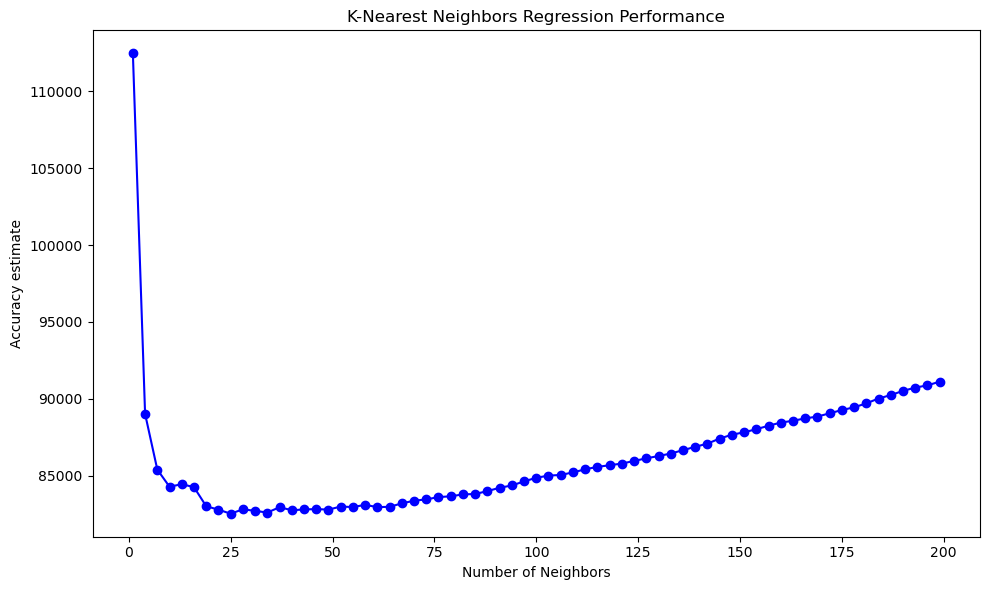

In [117]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [116]:
sacr_gridsearch.best_params_

{'n_neighbors': 25}

In [ ]:
## break

In [119]:
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

In [120]:
rmspe = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**0.5

rmspe

93573.27378694214

In [124]:
r2 = r2_score(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)

r2

NameError: name 'r2_score' is not defined

c:\Users\tinti\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


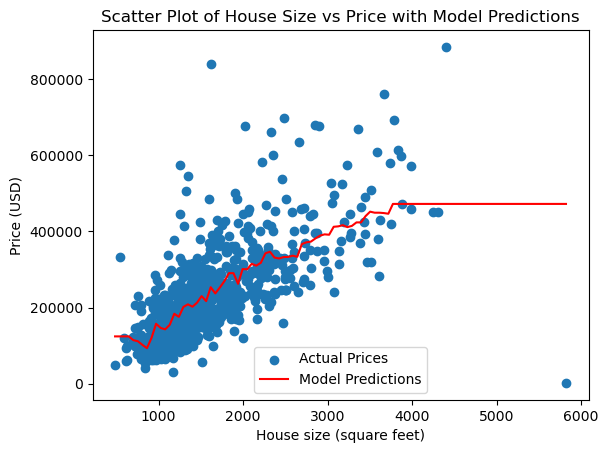

In [122]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();